9. This problem involves the OJ data set which is part of the ISLP package.

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [75]:
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
import sklearn.model_selection as skm
import numpy as np
import matplotlib.pyplot as plt

In [76]:
from sklearn.tree import (DecisionTreeClassifier, DecisionTreeRegressor, plot_tree)
from sklearn.metrics import (confusion_matrix, accuracy_score, mean_squared_error)

In [77]:
data = load_data('OJ')

In [78]:
data

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [79]:
data['Purchase']

0       CH
1       CH
2       CH
3       MM
4       CH
        ..
1065    CH
1066    CH
1067    MM
1068    CH
1069    CH
Name: Purchase, Length: 1070, dtype: object

In [80]:
N = len(data)

In [81]:
from sklearn.model_selection import train_test_split

### Convest No to 0 and Yes to 1
data = data.replace('No', 0)
data = data.replace('Yes', 1)

### Split data into training and test sets, 800 training and the rest is test set
train, test = train_test_split(data, test_size = (N-800)/N, random_state=1)

print ("The shape of training set:", train.shape)


The shape of training set: (800, 18)


(b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training error rate?

In [82]:
model = MS(data.columns.drop('Purchase'), intercept=False)
D = model.fit_transform(train)
features = list(D.columns)

X = np.asarray(data[features])
y = np.asarray(data['Purchase'])

X_train = np.asarray(train[features])
y_train = np.asarray(train['Purchase'])
X_test = np.asarray(test[features])
y_test = np.asarray(test['Purchase'])

In [83]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
### Accuracy score of test set

accuracy_score(y_train, clf.predict(X_train))

error_rate = 1 - accuracy_score(y_train, clf.predict(X_train))

print (error_rate)

0.010000000000000009


(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?

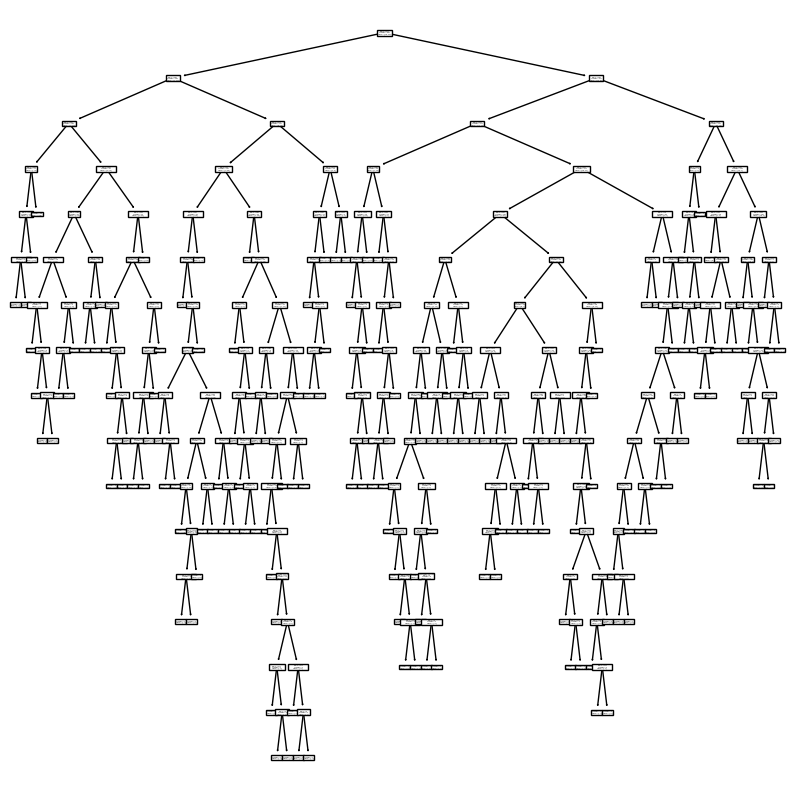

In [85]:
### Plot the tree
ax = plt.subplots(figsize= (10, 10))[1]
plot_tree(clf, feature_names=features, ax=ax)
plt.show()

In [86]:
### Find the nodes of the tree 
nodes = clf.tree_.node_count
print (nodes)

327


(d) Use the export_tree () function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.

In [87]:
### A text summary of the fitted tree

from sklearn.tree import export_text
print (export_text(clf, feature_names=features))

|--- LoyalCH <= 0.45
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.05
|   |   |   |--- StoreID <= 2.50
|   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |--- WeekofPurchase <= 269.50
|   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |--- WeekofPurchase >  269.50
|   |   |   |   |   |   |--- class: MM
|   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |--- class: MM
|   |   |   |--- StoreID >  2.50
|   |   |   |   |--- class: MM
|   |   |--- LoyalCH >  0.05
|   |   |   |--- WeekofPurchase <= 249.50
|   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |--- WeekofPurchase <= 235.50
|   |   |   |   |   |   |--- WeekofPurchase <= 232.00
|   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |--- WeekofPurchase >  232.00
|   |   |   |   |   |   |   |--- SpecialCH <= 0.50
|   |   |   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |   |   |--- SpecialCH >  0.50
|   |   |   |   |   |   |   |   |--- LoyalCH <= 0.22
|   |   |   |   |   |   |   |   

(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [88]:
print (accuracy_score(y_test, clf.predict(X_test)))
confusion = confusion_table(y_test, clf.predict(X_test))
print (confusion)

0.7555555555555555
Truth       CH  MM
Predicted         
CH         131  26
MM          40  73


(f) Use cross-validation on the training set in order to determine the optimal tree size.

In [89]:
grid = skm.GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': np.arange(1, 10)}, cv=10, scoring = 'accuracy')
X_train = np.asarray(train[features])
y_train = np.asarray(train['Purchase'])
grid.fit(X_train, y_train)
print (grid.best_params_)

{'max_depth': 4}


In [90]:
best_ = grid.best_estimator_
### The best parameter to investigate is tree_size and it depends on the K-fold cross validation

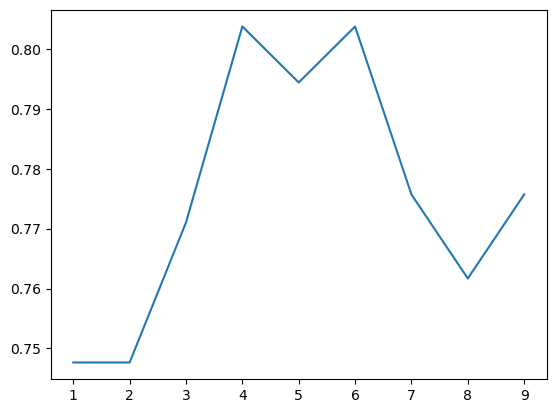

In [91]:
accuracy_scores = []
kf = skm.KFold(n_splits=5, shuffle=False)
for max_depth in np.arange(1, 10):
    score =[]
    clf = DecisionTreeClassifier(max_depth=max_depth)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        # score.append(accuracy_score(y_train, clf.predict(X_train)))
        score = accuracy_score(y_test, clf.predict(X_test))
        # print ("Max depth:", max_depth, "Accuracy:", score)
    accuracy_scores.append(np.mean(score))
plt.plot(np.arange(1, 10), accuracy_scores)
plt.show()

(h) Which tree size corresponds to the lowest cross-validated classification error rate?

In [92]:
###???
# When cross validation is used, the accuracy score is the average of the accuracy scores of each fold on the training set?

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

In [98]:
### Pruning
clf_prune = DecisionTreeClassifier(max_depth = 4, ccp_alpha = 0.01)
clf_prune.fit(X_train, y_train)
print (accuracy_score(y_test, clf_prune.predict(X_test)))
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)
print (accuracy_score(y_test, clf.predict(X_test)))


0.7663551401869159
0.8037383177570093


(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?